# Bivariate Analysis
## - Investigate relationships between two features <br> -Include scatter plots, correlation matrices, or other relevant visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../data/regional_multivariate_data.csv")

df['date'] = pd.to_datetime(df['date'])
df.head()

/Users/spencerhuie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


FileNotFoundError: [Errno 2] No such file or directory: '../data/regional_multivariate_data.csv'

<AxesSubplot:>

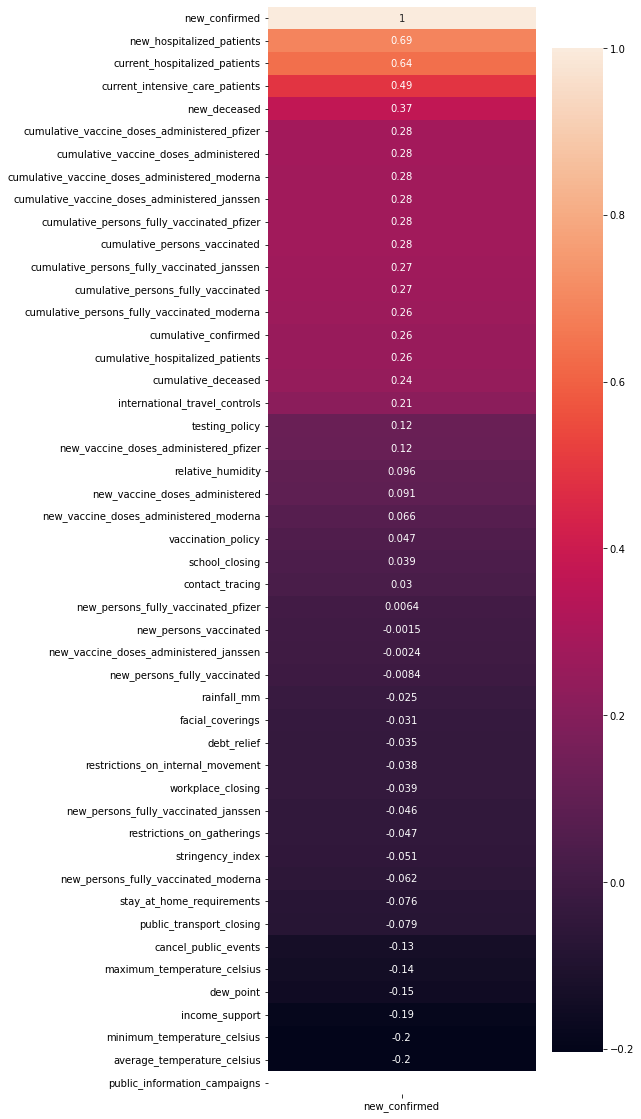

In [ ]:
numeric_data = df.iloc[:, 2:50]
plt.figure(figsize=(6, 20))
sns.heatmap(numeric_data.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Few features have moderate or strong correlations with new_confirmed

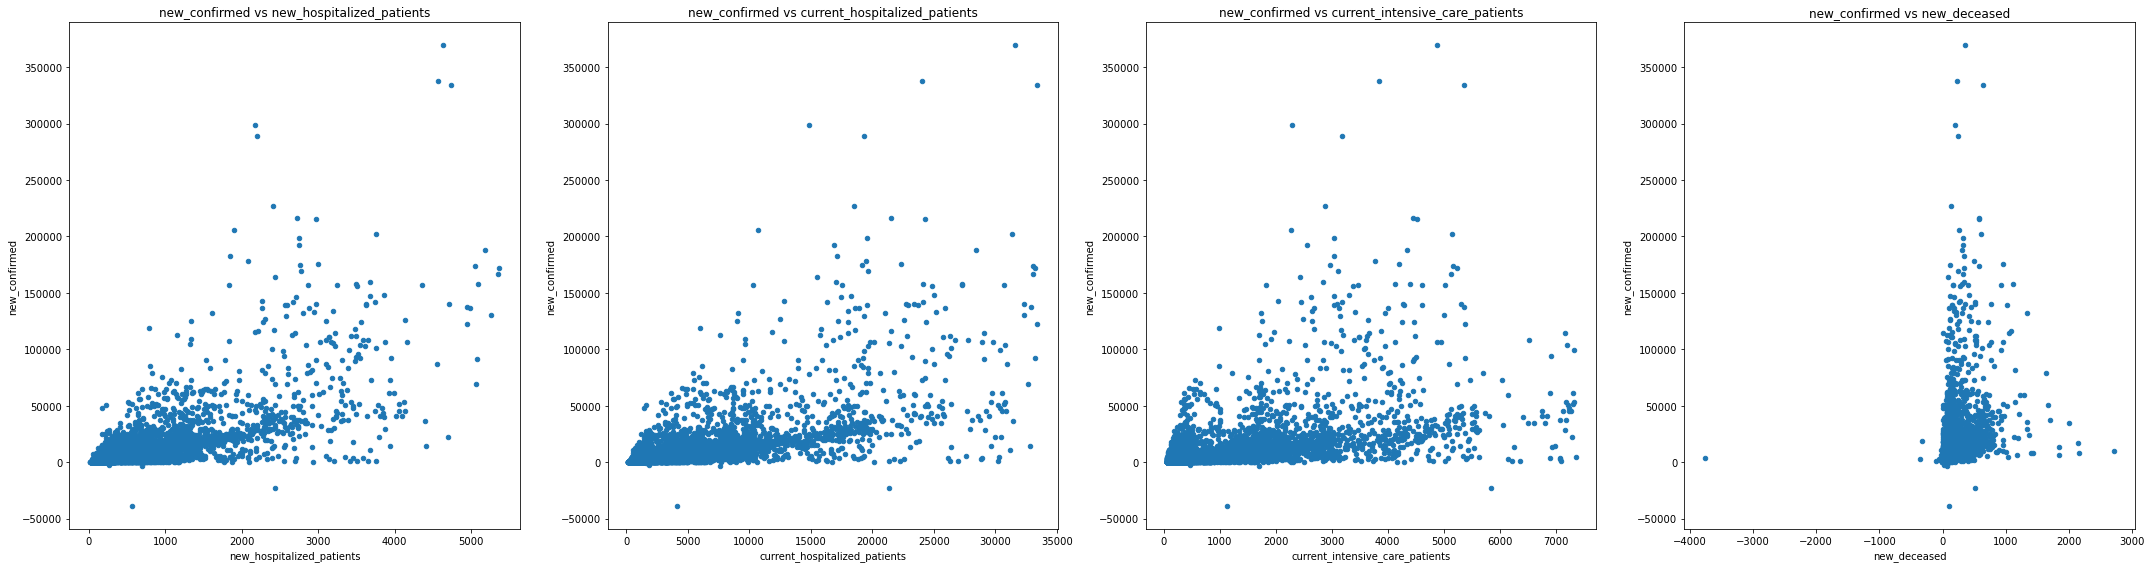

In [ ]:
correlated_features = ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased']
fig, axes = plt.subplots(nrows=1, ncols=len(correlated_features), figsize=(30, 8))

for i, feature in enumerate(correlated_features):
    df.plot(kind='scatter', x=feature, y='new_confirmed', ax=axes[i])
    axes[i].set_title(f'new_confirmed vs {feature}')
plt.tight_layout()
plt.show()

## Log transformations improve visibility - four features are positively correlated with new_confirmed

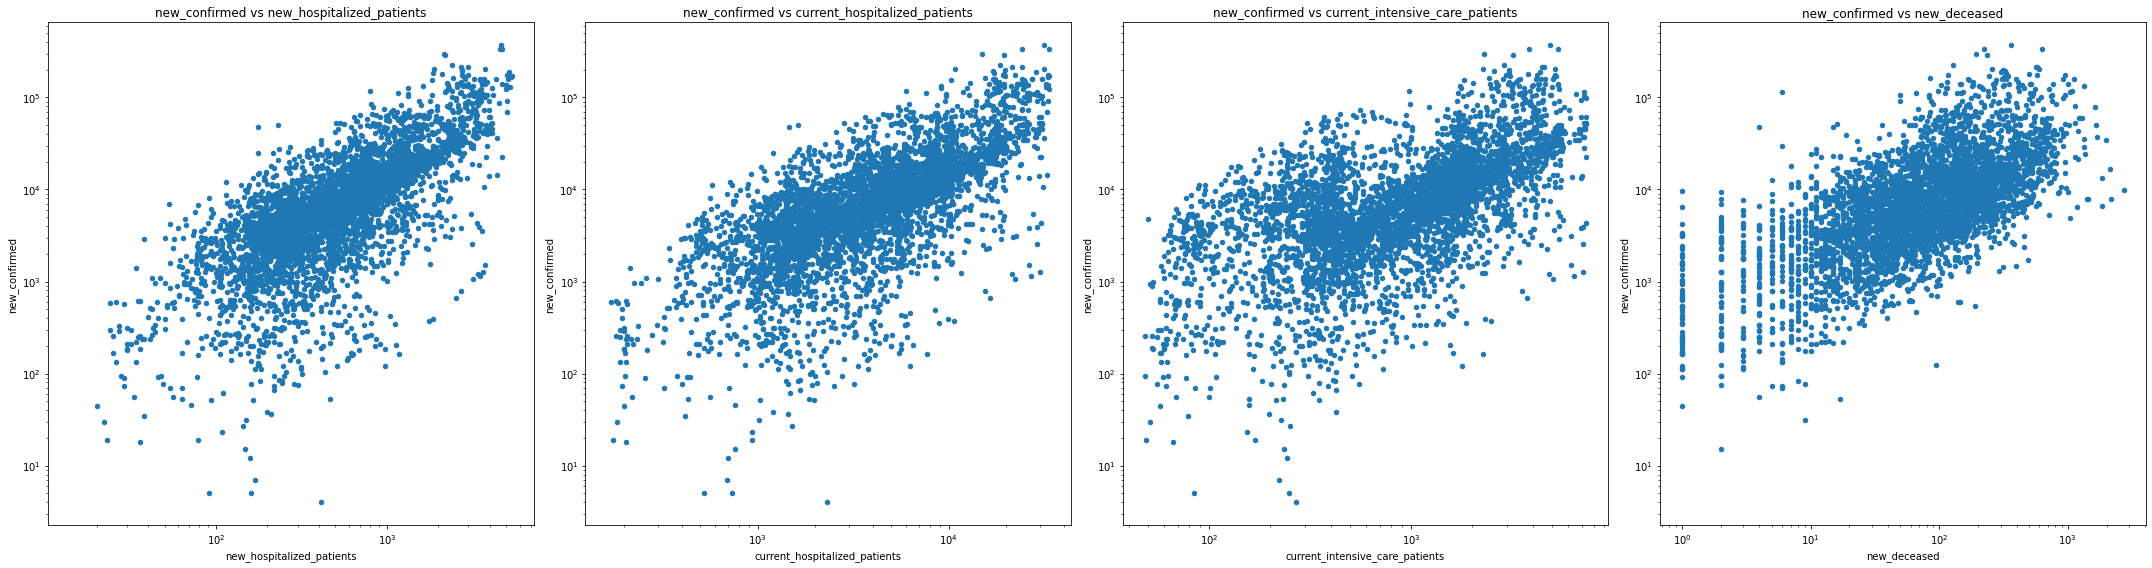

In [ ]:
correlated_features = ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased']
fig, axes = plt.subplots(nrows=1, ncols=len(correlated_features), figsize=(30, 8))

for i, feature in enumerate(correlated_features):
    df.plot(kind='scatter', x=feature, y='new_confirmed', ax=axes[i], logx = True, logy = True)
    axes[i].set_title(f'new_confirmed vs {feature}')
plt.tight_layout()
plt.show()

# Exploring Log Transformations

<AxesSubplot:>

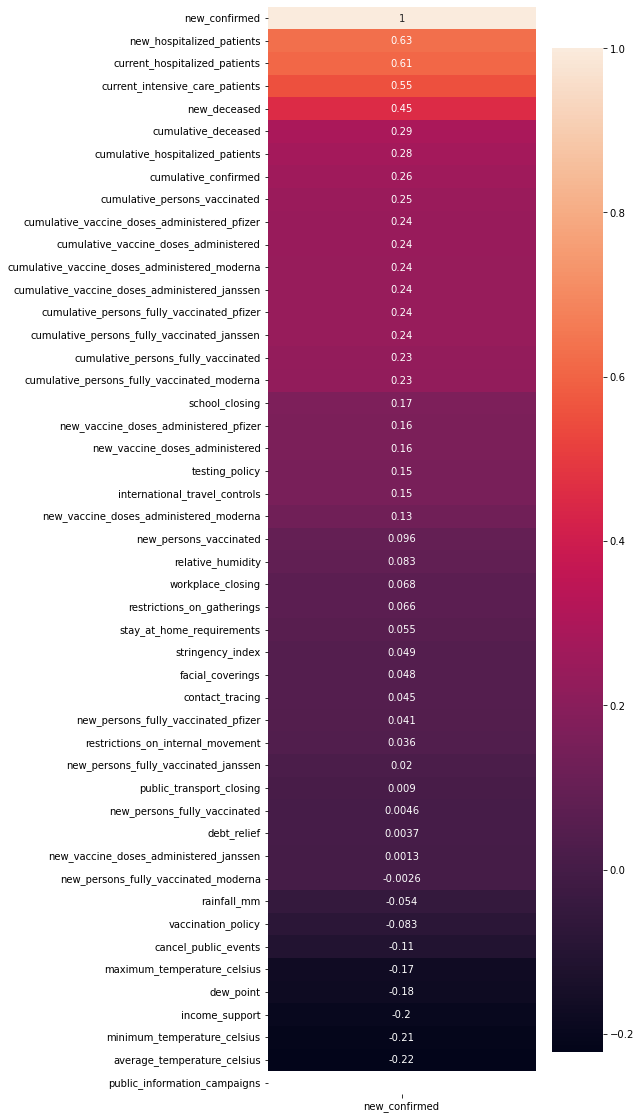

In [ ]:

log_numeric_features = numeric_data.copy()
log_numeric_features['new_confirmed'] = np.log(log_numeric_features['new_confirmed'])
plt.figure(figsize=(6, 20))
sns.heatmap(log_numeric_features.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Transformation of only new_confirmed reveals little new information, no new significant features

<AxesSubplot:>

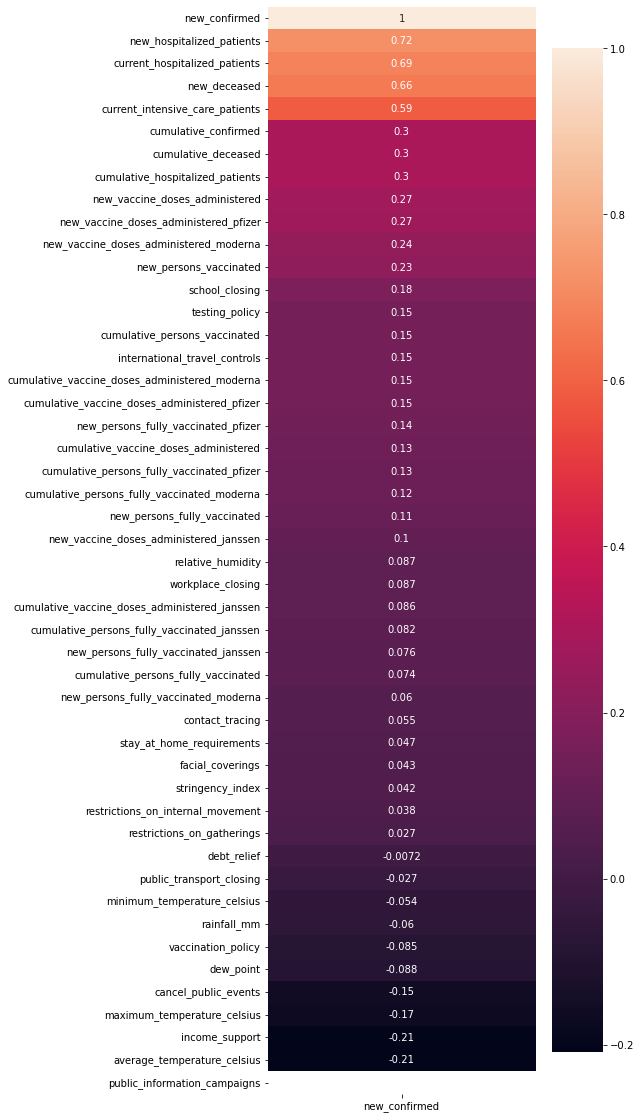

In [ ]:
log_numeric_features = np.log(numeric_data)
plt.figure(figsize=(6, 20))
sns.heatmap(log_numeric_features.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Transformation of all numeric features to log improves the correlation of the previoulsy discovered significantly correlated features to new_confirmed. This also reveals 3 new features (cumulative_confirmed, cumulative_deceased, and cumulative_hospitalized_patients) that cross the significance threshold (abs > 0.3). However, since they are all cumulative statistics who's "new_" features are already significant, we won't explore these new featuers at the moment.